# **DSL 24-1 기초 과제 1**

### 기수 :
### 이름 :

In [ ]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

필수 라이버러리 갖고오기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [ ]:
path_to_image = "./data//image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

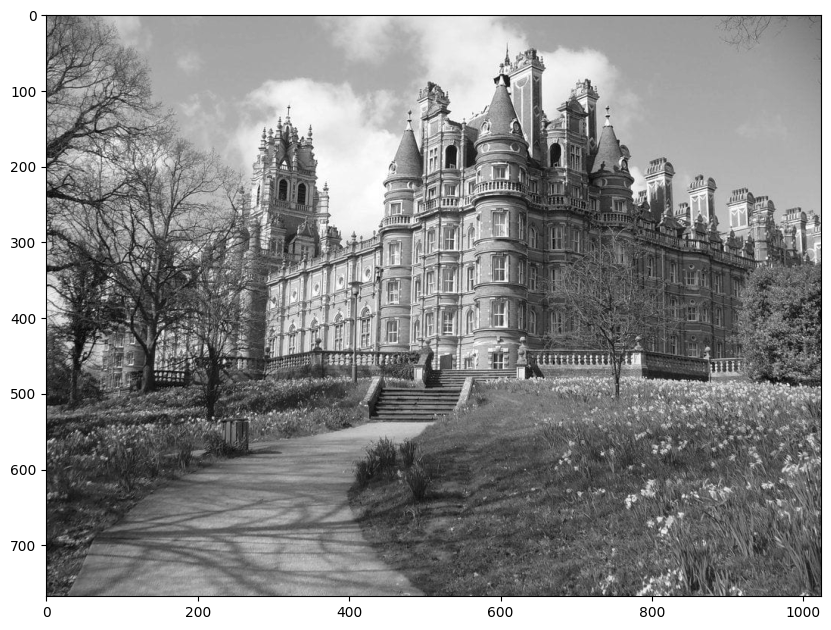

In [ ]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [ ]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [ ]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉(나머지 원소들은 $0$ )

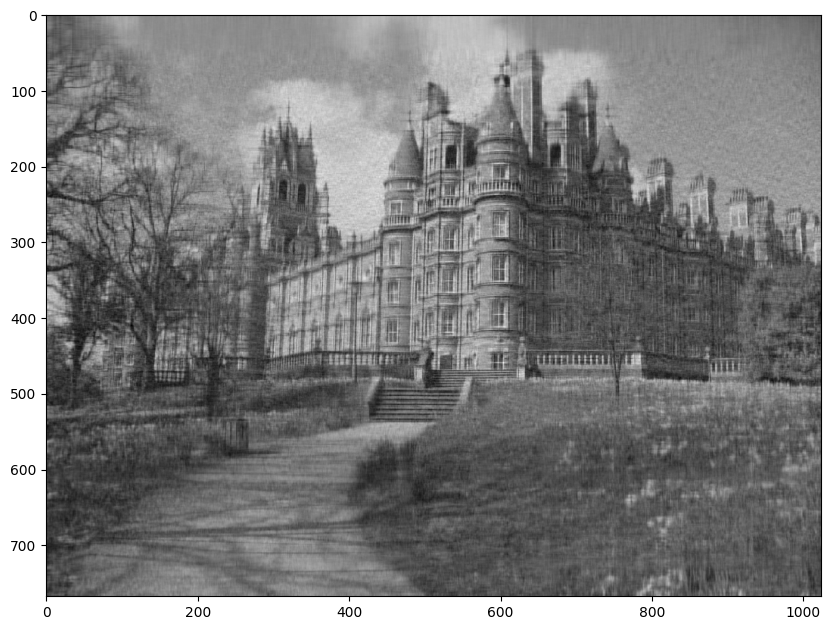

In [ ]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [ ]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 8.20548 seconds
Processing Time for 10 Compressed Images: 0.43735 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다.
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [ ]:
path_to_image = "/content/drive/MyDrive/custom_image.jpg"

In [ ]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

In [ ]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

시그마 메트릭스 $(\Sigma)$ 차원 설정

In [ ]:
num_elements = 70

고유값이 일정값보다 큰 경우만 취한다.

In [ ]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [ ]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [ ]:
path_to_csv = "/content/drive/MyDrive/heights.csv"

전처리

In [ ]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [ ]:
DSL.head()

heights which
0    181.8   DSL
1    161.3   DSL
2    177.8   DSL
3    169.1   DSL
4    181.2   DSL

ESC 데이터 형태

In [ ]:
ESC.head()

heights which
78    171.1   ESC
79    159.2   ESC
80    184.9   ESC
81    176.1   ESC
82    184.8   ESC

Else 데이터 형태

In [ ]:
  Else.head()

heights which
141    180.6  Else
142    169.3  Else
143    176.0  Else
144    180.3  Else
145    177.7  Else

In [ ]:
import scipy.stats as scst

# Perform one-way ANOVA
f_statistic, p_value = scst.f_oneway(DSL["heights"], ESC["heights"], Else["heights"])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Significance level
alpha = 0.05

# Interpretation
if p_value < alpha:
    print("유의미한 차이")
else:
    print("차이 없다.")


## **문제 6**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [ ]:
import pandas as pd

path_to_csv = "/content/drive/MyDrive/train.csv"
data = pd.read_csv(path_to_csv)

In [ ]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [ ]:
filtered=[]
split=list(data["Name"].str.split(","))

for i in range(len(split)):
  filtered.append(split[i][0])
data["filtered"]=filtered
data

6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [ ]:
# TO-DO
data_sorted=data.sort_values(by="Age")
data_sorted

6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

In [ ]:
# TO-DO
import matplotlib.pyplot as plt

cabin_count=data["Cabin"].value_counts(dropna=False)

plt.figure(figsize=(40, 20))

cabin_count.plot(kind='bar')
plt.title('Cabin Count')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()

6-4. (Optional)

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 Survived 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [3]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)

tensor = np.zeros((4, 2, 2), dtype=int)

tensor[0] = arr[:2, :2]
tensor[1] = arr[1:, :2]
tensor[2] = arr[:2, 1:]
tensor[3] = arr[1:, 1:]

print(tensor)


[[[1 2]
  [4 5]]

 [[4 5]
  [7 8]]

 [[2 3]
  [5 6]]

 [[5 6]
  [8 9]]]


6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.

![image.png](attachment:image.png)

In [4]:
# TO-DO

gaussian = np.random.normal(0, 1, 100)
uniform = np.random.uniform(0, 1, 100)

plt.figure(figsize=(40, 20))

plt.hist(uniform, bins=25, alpha=0.5, color='blue', label='Uniform')
plt.hist(gaussian, bins=25, alpha=0.5, color='orange', label='Gaussian')

uniform_mean = np.mean(uniform)
uniform_median = np.median(uniform)
gaussian_mean = np.mean(gaussian )
gaussian_median = np.median(gaussian)

plt.axvline(uniform_mean, color='blue', linestyle='dashed', linewidth=1, label=f'Uniform Mean: {uniform_mean}')
plt.axvline(uniform_median, color='blue', linestyle='dashed', linewidth=1, label=f'Uniform Median: {uniform_median}', alpha=0.4)
plt.axvline(gaussian_mean, color='orange', linestyle='dashed', linewidth=1, label=f'Gaussian Mean: {gaussian_mean}')
plt.axvline(gaussian_median, color='orange', linestyle='dashed', linewidth=1, label=f'Gaussian Median: {gaussian_median}', alpha=0.4)

plt.legend()
plt.show()

NameError: name 'plt' is not defined